# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Exploración de los datos](#exploracion_datos)
    * [Conclusiones y siguientes pasos](#conclusiones) 
* [Etapa 2. Trabajar con valores ausentes](#valores_ausentes)
* [Etapa 3. Transformación de datos](#transformacion_datos)
* [Etapa 4. Enriquecer datos](#enriquecer)
* [Etapa 5. Comprobar datos limpios](#comprobar)
* [Etapa 6. Estudiar parámetros principales](#estudiar)
* [Etapa 7. Estudiar y tratar valores atípicos](#atipicos)
* [Etapa 8. Estudiar parámetros principales sin valores atípicos](#sin_atipicos)
* [Etapa 9. Periodo de colocación de los anuncios](#anuncios) 
* [Etapa 10. Precio promedio por cada tipo de vehículo](#precio)
* [Etapa 11. Factores de precio](#factores)
* [Etapa 12. Conclusión general](#general)


# ¿Qué vende un coche? <a id='intro'></a>
Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Este proyecto tiene como propósito determinar que factores influyen en el precio de los vehículos, la información se obtiene de los cientos de anuncios de vehículos que se publican cada día en el sitio web. Se va a tratar los valores ausentes, corregir los tipo de datos, hacer comprobaciones con los datos limpios, estudiar parámetros principales y tratar valores atípicos para luego determinar las conclusiones del estudio. 


## Inicialización

In [1]:
# Importación de librerías

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame

datos = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales <a id='exploracion_datos'></a>

El dataset contiene los siguientes campos:
- `price` — precio del vehículo
- `model_year` — año del modelo
- `model`— modelo del vehículo
- `condition` — estado en el que se encuentra el vehículo
- `cylinders` — cantidad de cilindros del vehículo
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` — tipo de transmisión
- `paint_color` — color del vehículo
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [3]:
# imprime la información general/resumida sobre el DataFrame

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos

datos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Tenemos un conjunto de datos conformado por 13 columnas, en algunas se necesita ajustar su tipo de dato, tiene 51525 filas de las cuales algunas tienen valores ausentes. 

Tenemos columnas que necesitan cambiar sus tipos de datos estas son: model_year es de tipo float y debe ser tipo fecha, odometer debe ser entero, is_4wd debe ser de tipo Booleano.

Tenemos columnas con valores ausentes estas son: model_year, cylinders, odometer, paint_color, pero is_4wd es la columna que tiene la mayor cantidad. 

### Conclusiones y siguientes pasos <a id='conclusiones'></a>


En vista que los datos presentan algunos problemas que deben ser tratados, se procede a estudiar los valores ausentes para determinar que hacer con ellos, a primera vista se puede determinar que los valores ausentes en la columna is_4wd tienen un patrón (MNAR), solo tiene 1 y NaN por lo que se puede intuir que el NaN corresponde a 0 y estos vehículos no cuentan con tracción en las 4 ruedas, se van a reemplazar los valores ausentes por 0 ya que siginifica ausencia de dato y así poder cambiar el tipo de dato a entero. También se va a cambiar el tipo de datos a las columnas que lo necesitan para poder trabajar adecuadamente con estos datos. 

## Tratar los valores ausentes (si hay) <a id='valores_ausentes'></a>

In [5]:
# estudiar valores ausentes
datos.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
#Reemplazar valores ausentes en 'is_4wd'
datos.fillna({'is_4wd':0}, inplace=True)

#Reemplazar valores ausentes en 'paint_color'
datos.fillna({'paint_color': 'No disponible'}, inplace=True)


Al no poder calcular medias y medianas en las variables 'paint_color' se decide reemplazarlas por 'No disponible, de esta manera no se afectan los valores del resto de los datos. 

In [7]:
# Creando tabla sin ausentes para reemplazar valores ausentes de variables cuantitativas

datos_sin_ausentes= datos.dropna()
datos_sin_ausentes.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,No disponible,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73


In [8]:
#Examinando los valores medios y medianas en 'cylinders' en función de otros factores

print(datos_sin_ausentes.groupby('type')['cylinders'].mean())
print()
print(datos_sin_ausentes.groupby('type')['cylinders'].median())
print()

type
SUV            5.908231
bus            9.052632
convertible    7.003049
coupe          6.479067
hatchback      4.177989
mini-van       5.962424
offroad        6.137500
other          5.687151
pickup         7.190089
sedan          4.575868
truck          7.500456
van            6.440758
wagon          4.890424
Name: cylinders, dtype: float64

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64



Se calcularon las medias y las medianas de la cantidad de cilindros por tipos de vehículos y se concluye utilizar la mediana  ya que como existen diferencia entre ambos valores, la mediana es un valor mas confiable, ya que no se ve influenciada por los valores mas altos y mas bajos del conjunto de datos. 

In [9]:
# Se utilizará la mediana para reemplazar los valores ausentes
datos['cylinders']= datos.groupby('type')['cylinders'].transform(lambda x: x.fillna(x.median()))

In [10]:
# Examinando los valores medios y medianas en 'model_year' en función de otros factores

print(datos_sin_ausentes.groupby('model')['model_year'].mean())
print()
print(datos_sin_ausentes.groupby('model')['model_year'].median())
print()

model
acura tl             2007.369048
bmw x5               2008.954315
buick enclave        2012.237374
cadillac escalade    2009.099099
chevrolet camaro     2008.136508
                        ...     
toyota sienna        2008.697872
toyota tacoma        2009.281787
toyota tundra        2009.540603
volkswagen jetta     2010.808108
volkswagen passat    2011.210317
Name: model_year, Length: 99, dtype: float64

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2010.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 99, dtype: float64



Se calcularon las medias y las medianas de model_year por modelos de vehículos y se concluye utilizar la mediana ya que como existen diferencia entre ambos valores, la mediana es un valor mas confiable, ya que no se ve influenciada por los valores mas altos y mas bajos del conjunto de datos.

In [11]:
# Se utilizará la mediana para reemplazar los valores ausentes

datos['model_year']= datos.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

In [12]:
#Examinando los valores medios y medianas en 'odometer' en función de otros factores

print(datos_sin_ausentes.groupby('model_year')['odometer'].mean())
print()
print(datos_sin_ausentes.groupby('model_year')['odometer'].median())
print()

model_year
1908.0    169328.000000
1936.0     30000.000000
1948.0      4000.000000
1955.0     47180.000000
1958.0     32991.500000
              ...      
2015.0     82296.299880
2016.0     61566.251881
2017.0     47461.165661
2018.0     25063.455294
2019.0     17118.551839
Name: odometer, Length: 65, dtype: float64

model_year
1908.0    169328.0
1936.0     30000.0
1948.0      4000.0
1955.0     47180.0
1958.0     32991.5
            ...   
2015.0     78000.0
2016.0     54000.0
2017.0     41000.0
2018.0     20627.0
2019.0     14058.0
Name: odometer, Length: 65, dtype: float64



Se calcularon las medias y las medianas de la variable odometer por el año del modelo y se concluye utilizar la media ya que los valores son iguales.  

In [13]:
# Se utilizará la media para reemplazar los valores ausentes

datos['odometer']= datos.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.mean()))

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Se observa que aún queda un valor nulo en la variable odometer, se procede a eliminar esta fila ya que no causará ningun impacto en el analisis del conjunto total de datos. 

In [15]:
datos= datos.dropna()

In [16]:
# actualizar valores ausentes
datos.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [17]:
# Comprobar la tabla sin los valores ausentes reemplazados
datos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,No disponible,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,No disponible,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,No disponible,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17


## Corregir los tipos de datos <a id='transformacion_datos'></a>

In [18]:
# cambiar tipos de datos
datos['model_year'] = datos['model_year'].astype('int')
datos['date_posted'] = pd.to_datetime(datos['date_posted'], format='%Y-%m-%d')
datos['is_4wd'] = datos['is_4wd'].astype('bool')


In [19]:
# actualizar información general
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int64         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  float64       
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  bool          
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 5.2+ MB


## Enriquecer datos <a id='enriquecer'></a>

In [20]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
datos['day']= pd.DatetimeIndex(datos['date_posted']).day
datos['month']= pd.DatetimeIndex(datos['date_posted']).month
datos['year_publicacion']= pd.DatetimeIndex(datos['date_posted']).year
datos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018
1,25500,2011,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019


In [21]:
#Agrega los años del vehículo cuando el anuncio se colocó

datos.info()
datos['años_vehiculo'] = (datos['year_publicacion'] - datos['model_year']) + 1
datos.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51524 non-null  int64         
 1   model_year        51524 non-null  int64         
 2   model             51524 non-null  object        
 3   condition         51524 non-null  object        
 4   cylinders         51524 non-null  float64       
 5   fuel              51524 non-null  object        
 6   odometer          51524 non-null  float64       
 7   transmission      51524 non-null  object        
 8   type              51524 non-null  object        
 9   paint_color       51524 non-null  object        
 10  is_4wd            51524 non-null  bool          
 11  date_posted       51524 non-null  datetime64[ns]
 12  days_listed       51524 non-null  int64         
 13  day               51524 non-null  int64         
 14  month             5152

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion,años_vehiculo
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018,8
1,25500,2011,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7
3,1500,2003,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019,17
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3


In [22]:
# función para corregir problemáticos en 'años_vehiculo'
datos['años_vehiculo'].unique()
datos['años_vehiculo']= datos['años_vehiculo'].apply(lambda x: 0 if x > 1000 else x)
datos.head()



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion,años_vehiculo
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018,8
1,25500,2011,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7
3,1500,2003,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019,17
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3


In [23]:
# Agrega el millaje promedio del vehículo por año
   
datos['prom_odometer']= datos['odometer']/datos['años_vehiculo']
datos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion,años_vehiculo,prom_odometer
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019,17,9533.632413
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


In [24]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

def replace_condition(wrong_values,correct_values):
        datos['condition']= datos['condition'].replace(wrong_values,correct_values)
        
replace_condition(wrong_values= 'salvage', correct_values = 0)
replace_condition(wrong_values= 'fair', correct_values = 1)
replace_condition(wrong_values= 'good', correct_values = 2)
replace_condition(wrong_values= 'excellent', correct_values = 3)
replace_condition(wrong_values= 'like new', correct_values = 4)
replace_condition(wrong_values= 'new', correct_values = 5)



In [25]:
datos['condition'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

## Comprobar datos limpios <a id='comprobar'></a>

In [26]:
# imprime la información general/resumida sobre el DataFrame
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51524 non-null  int64         
 1   model_year        51524 non-null  int64         
 2   model             51524 non-null  object        
 3   condition         51524 non-null  int64         
 4   cylinders         51524 non-null  float64       
 5   fuel              51524 non-null  object        
 6   odometer          51524 non-null  float64       
 7   transmission      51524 non-null  object        
 8   type              51524 non-null  object        
 9   paint_color       51524 non-null  object        
 10  is_4wd            51524 non-null  bool          
 11  date_posted       51524 non-null  datetime64[ns]
 12  days_listed       51524 non-null  int64         
 13  day               51524 non-null  int64         
 14  month             5152

In [27]:
# imprimir una muestra de datos
datos.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion,años_vehiculo,prom_odometer
0,9400,2011,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019,17,9533.632413
4,14900,2017,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


## Estudiar parámetros principales <a id='estudiar'></a>

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

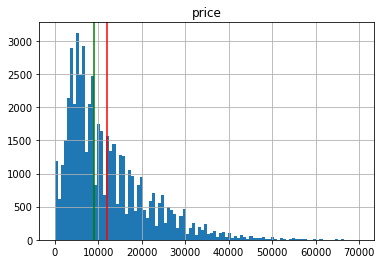

In [28]:
#
datos.hist('price',bins=100,range= (0,70000))
plt.axvline(12132,0,10000,color='red')
plt.axvline(9000,0,10000,color='green')
datos['price'].describe()


Se puede observar en el gráfico que el conjunto de datos tiene valores muy altos que están alejados del bloque principal, esto genera que la media(línea color verde) esté bastante alejada de la mediana(línea color rojo) por lo que se puede concluir que estos valores tan altos están afectando significativamente el promedio. 

count    51524.000000
mean         9.512344
std          6.102743
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: años_vehiculo, dtype: float64

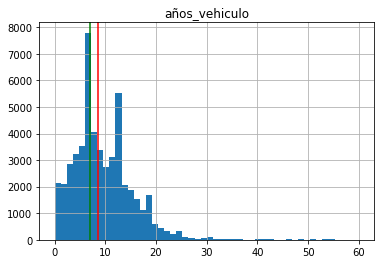

In [29]:
#
datos.hist('años_vehiculo',bins=50,range= (0,60))
plt.axvline(8.556966,0,10000,color='red')
plt.axvline(7.000000,0,10000,color='green')
datos['años_vehiculo'].describe()



Se puede observar en el gráfico que el conjunto de datos tiene algunos valores muy altos que están bastante alejados del bloque principal, estos valores atípicos generan que la media (línea color verde) esté alejada de la mediana (línea color rojo) por lo que se puede concluir que estos valores tan altos están afectando el promedio.

count     51524.000000
mean     115537.986912
std       61872.130623
min           0.000000
25%       73500.000000
50%      114082.500000
75%      152011.719127
max      990000.000000
Name: odometer, dtype: float64

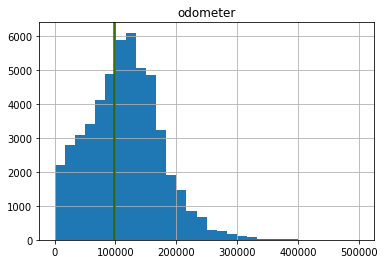

In [30]:
#
datos.hist('odometer',bins=30,range= (0,500000))
plt.axvline(97854.326948,0,10000,color='red')
plt.axvline(99114,0,10000,color='green')
datos['odometer'].describe()



Se puede observar en el gráfico que el conjunto de datos tiene algunos valores muy altos que están alejados del bloque principal, sin embargo estos valores atípicos no tienen un impacto tan grande en el promedio ya que la media (línea color verde)no está tan alejada de la mediana (línea color rojo).

count    51524.000000
mean         6.130774
std          1.658410
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

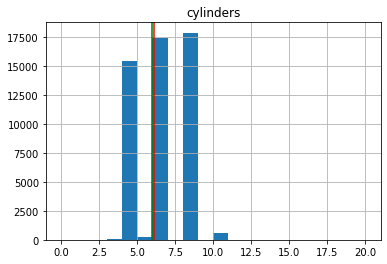

In [31]:
#
datos.hist('cylinders',bins=20,range= (0,20))
plt.axvline(6.125235,0,10000,color='red')
plt.axvline(6.000000,0,10000,color='green')
datos['cylinders'].describe()



Se puede observar en el gráfico que el conjunto de datos tiene algunos valores pequeños sin embargo estos valores no tienen un impacto tan grande en el promedio ya que la media (línea color verde) no está tan alejada de la mediana(línea color rojo).

count    51524.000000
mean         2.637548
std          0.712449
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

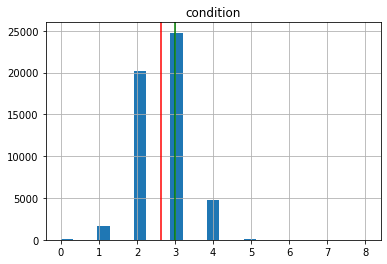

In [32]:
#
datos.hist('condition',bins=25,range= (0,8))
plt.axvline(2.637535,0,10000,color='red')
plt.axvline(3.000000,0,10000,color='green')
datos['condition'].describe()



Se puede observar en el gráfico que el conjunto de datos tiene algunos valores muy pequeños mientras que los valores 2 y 3 tienen la mayor cantidad de valores lo que genera que el promedio se vea afectado pot lo que se puede observar que la media (línea color verde) está algo alejada de la mediana(línea color rojo).

## Estudiar y tratar valores atípicos <a id='atipicos'></a>


In [33]:
# Determina los límites inferiores para valores atípicos

# columna price
resultados_price= datos['price'].describe()
iqr_price = resultados_price['75%'] - resultados_price['25%']
inferior_price= resultados_price['25%'] - (1.5*iqr_price)

# columna años_vehiculo
resultados_años= datos['años_vehiculo'].describe()
iqr_años = resultados_años['75%'] - resultados_años['25%']
inferior_años= resultados_años['25%'] - (1.5*iqr_años)

# columna odometer
resultados_odometer= datos['odometer'].describe()
iqr_odometer = resultados_odometer['75%'] - resultados_odometer['25%']
inferior_odometer= resultados_odometer['25%'] - (1.5*iqr_odometer)

# columna cylinders
resultados_cylinders= datos['cylinders'].describe()
iqr_cylinders = resultados_cylinders['75%'] - resultados_cylinders['25%']
inferior_cylinders= resultados_cylinders['25%'] - (1.5*iqr_cylinders)

# columna condition
resultados_condition= datos['condition'].describe()
iqr_condition = resultados_condition['75%'] - resultados_condition['25%']
inferior_condition= resultados_condition['25%'] - (1.5*iqr_condition)

print((f'El limite inferior de la columna price es: {inferior_price}'))
print((f'El limite inferior de la columna años_vehiculo es: {inferior_años}'))     
print((f'El limite inferior de la columna odometer es: {inferior_odometer}'))
print((f'El limite inferior de la columna cylinders es: {inferior_cylinders}'))
print((f'El limite inferior de la columna condition es: {inferior_condition}'))


El limite inferior de la columna price es: -12754.0
El limite inferior de la columna años_vehiculo es: -7.0
El limite inferior de la columna odometer es: -44267.57869040783
El limite inferior de la columna cylinders es: -2.0
El limite inferior de la columna condition es: 0.5


In [34]:
# Determinar los límites superiores para valores atípicos

# columna price
resultados_price= datos['price'].describe()
iqr_price = resultados_price['75%'] - resultados_price['25%']
superior_price= resultados_price['75%'] + (1.5*iqr_price)

# columna años_vehiculo
resultados_años= datos['años_vehiculo'].describe()
iqr_años = resultados_años['75%'] - resultados_años['25%']
superior_años= resultados_años['75%'] + (1.5*iqr_años)

# columna odometer
resultados_odometer= datos['odometer'].describe()
iqr_odometer = resultados_odometer['75%'] - resultados_odometer['25%']
superior_odometer= resultados_odometer['75%'] + (1.5*iqr_odometer)

# columna cylinders
resultados_cylinders= datos['cylinders'].describe()
iqr_cylinders = resultados_cylinders['75%'] - resultados_cylinders['25%']
superior_cylinders= resultados_cylinders['75%'] + (1.5*iqr_cylinders)

# columna condition
resultados_condition= datos['condition'].describe()
iqr_condition = resultados_condition['75%'] - resultados_condition['25%']
superior_condition= resultados_condition['75%'] + (1.5*iqr_condition)

print((f'El limite superior de la columna price es: {superior_price}'))
print((f'El limite superior de la columna años_vehiculo es: {superior_años}'))     
print((f'El limite superior de la columna odometer es: {superior_odometer}'))
print((f'El limite superior de la columna cylinders es: {superior_cylinders}'))
print((f'El limite superior de la columna condition es: {superior_condition}'))



El limite superior de la columna price es: 34590.0
El limite superior de la columna años_vehiculo es: 25.0
El limite superior de la columna odometer es: 269779.2978173464
El limite superior de la columna cylinders es: 14.0
El limite superior de la columna condition es: 4.5


In [35]:
# Almacena los datos sin valores atípicos en un DataFrame separado
datos_sin_atipicos= datos[
    (datos['price'] < superior_price) & (datos['años_vehiculo'] < superior_años) & (datos['odometer']< superior_odometer)
    & (datos['cylinders'] < superior_cylinders) & (datos['condition'] < superior_condition)]

datos_sin_atipicos.columns = [
    'price_sin_atipicos','model_year','model','condition_sin_atipicos','cylinders_sin_atipicos','fuel',
    'odometer_sin_atipicos','transmission','type','paint_color','is_4wd','date_posted','days_listed','day',
    'month','year_publicacion','años_vehiculo_sin_atipicos','promedio_odometer']

datos_sin_atipicos.head()

,price_sin_atipicos,model_year,model,condition_sin_atipicos,cylinders_sin_atipicos,fuel,odometer_sin_atipicos,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year_publicacion,años_vehiculo_sin_atipicos,promedio_odometer
0,9400,2011,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,No disponible,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4.0,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,162071.751024,automatic,pickup,No disponible,False,2019-03-22,9,22,3,2019,17,9533.632413
4,14900,2017,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


## Estudiar parámetros principales sin valores atípicos <a id='sin_atipicos'></a>

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

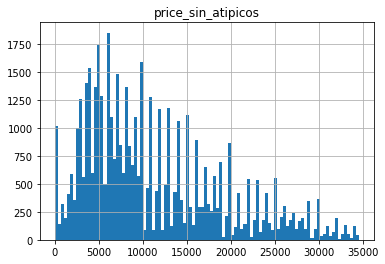

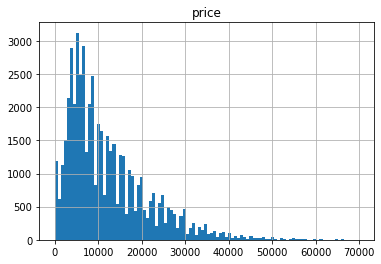

In [36]:
#Comparación de histogramas columna price

datos_sin_atipicos.hist('price_sin_atipicos',bins=100) 
datos.hist('price',bins=100,range= (0,70000))



Los gráficos contienen la frecuencia de la variable price, se hicieron dos gráficos uno con todos los datos y otro sin los valores atípicos, se pueden observar algunas diferencias entre ambos, los picos se mantienen, la mayoría de datos se encuentran en los valores cercanos a los 5000 y luego a medida que aumenta el precio va bajando la cantidad de anuncios publicados con algunas intermitencias.  

array([[<AxesSubplot:title={'center':'años_vehiculo'}>]], dtype=object)

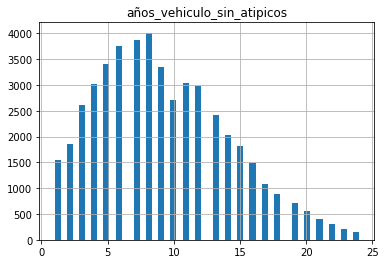

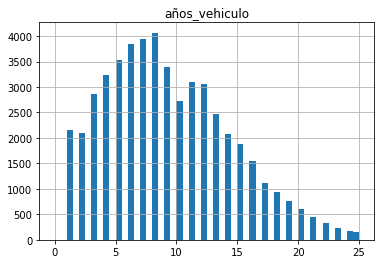

In [37]:
#Comparación de histogramas columna años_vehiculo

datos_sin_atipicos.hist('años_vehiculo_sin_atipicos',bins=50) 
datos.hist('años_vehiculo',bins=50,range= (0,25))

Los gráficos contienen la frecuencia de la variable años_vehiculo, se hicieron dos gráficos uno con todos los datos y otro sin los valores atípicos, no hay mucha diferencia entre ambos, los picos se mantienen, la mayoría de datos se encuentran en los valores cercanos a los 5 años y luego tenemos otro pico a los 11 años, a partir de ahí a medida que aumentan los años del vehículo van bajando la cantidad de anuncios publicados.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

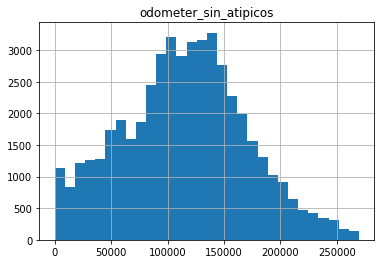

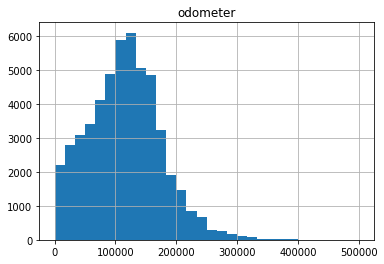

In [38]:
#Comparación de histogramas columna odometer

datos_sin_atipicos.hist('odometer_sin_atipicos',bins=30) 
datos.hist('odometer',bins=30,range= (0,500000))

Los gráficos contienen la frecuencia de la variable odometer, se hicieron dos gráficos uno con todos los datos y otro sin los valores atípicos, podemos observar un nuevo pico en el valor de 150000 el resto se mantiene sin muchas diferencias, el pico principal se mantiene, la mayoría de datos se encuentran entre los 100000 y 150000, a partir de ahí a medida que aumenta el millaje van bajando la cantidad de anuncios publicados.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

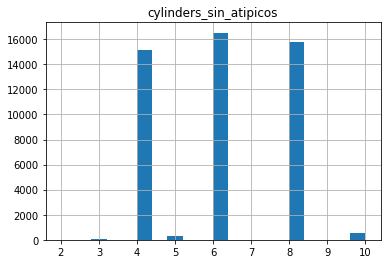

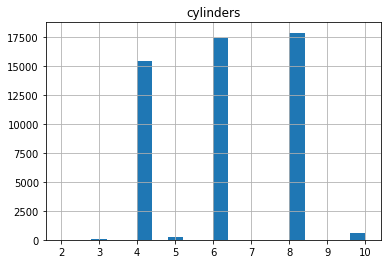

In [39]:
#Comparación de histogramas columna cylinder

datos_sin_atipicos.hist('cylinders_sin_atipicos',bins=20,range= (2,10)) 
datos.hist('cylinders',bins=20,range= (2,10))

Los gráficos contienen la frecuencia de la variable cylinders, se hicieron dos gráficos uno con todos los datos y otro sin los valores atípicos, se puede observar una diferencia en los picos de ambas gráficas, en el gráfico con todos los valores la mayor cantidad de datos se encuentra en 8 cilindros y muy poca diferencia con 6 cilindros, mientras que en el gráfico sin valores atípicos el pico se encuentra en 6 cilindros seguido por 8 cilindros. En ambos gráficos 3, 5 y 10 tienen muy poca frecuencias. 

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

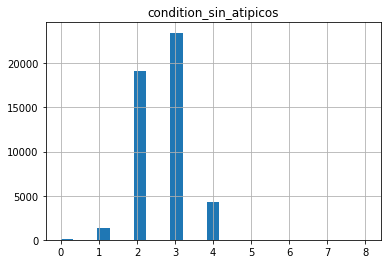

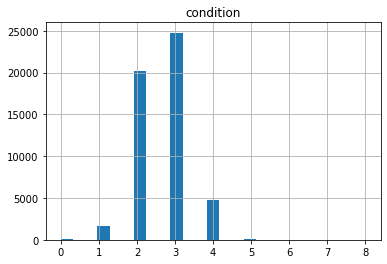

In [40]:
#Comparación de histogramas columna condition

#nuevo = 5
#como nuevo = 4
#excelente = 3
#bien = 2
#bastante = 1
#para rescate = 0

datos_sin_atipicos.hist('condition_sin_atipicos',bins=25,range= (0,8)) 
datos.hist('condition',bins=25,range= (0,8))


Los gráficos contienen la frecuencia de la variable condition, se hicieron dos gráficos uno con todos los datos y otro sin los valores atípicos, se puede observar que no hay diferencia entre los dos conjuntos de datos, los picos se encuentra en el número 3= Excelente, y los que tienen menos frecuencia son 0= para rescate y 5= nuevo.

## Periodo de colocación de los anuncios <a id='anuncios'></a>


In [41]:
datos_sin_atipicos['days_listed'].describe()

count    48272.000000
mean        39.543110
std         28.218767
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

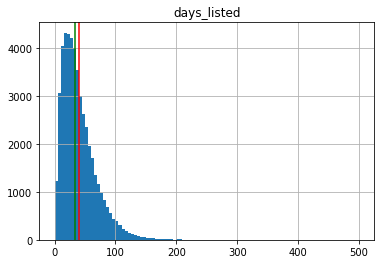

In [42]:
datos_sin_atipicos.hist('days_listed',bins=100,range= (0,500)) 
plt.axvline(39.563914,0,10000,color='red')
plt.axvline(33.000000,0,10000,color='green')

In [43]:
#cuando se eliminaron rápidamente

result_days_listed= datos_sin_atipicos['days_listed'].describe()
days_minimos= datos_sin_atipicos[(datos_sin_atipicos['days_listed'] == 0)]
days_minimos_median= days_minimos[['price_sin_atipicos','años_vehiculo_sin_atipicos','odometer_sin_atipicos',
                                   'cylinders_sin_atipicos','condition_sin_atipicos']]
days_minimos_median.median()


price_sin_atipicos              9950.0
años_vehiculo_sin_atipicos        10.0
odometer_sin_atipicos         121000.0
cylinders_sin_atipicos             6.0
condition_sin_atipicos             3.0
dtype: float64

In [44]:
#determinando un límite superior

resultados_days_listed= datos['days_listed'].describe()
iqr_days_listed = resultados_days_listed['75%'] - resultados_days_listed['25%']
superior_days_listed= resultados_days_listed['75%'] + (1.5*iqr_days_listed)
print((f'El limite superior de la columna days_listed es: {superior_days_listed}'))


El limite superior de la columna days_listed es: 104.0


In [45]:
# cuando son publicados por un tiempo anormalmente largo

days_maximo= datos_sin_atipicos[(datos_sin_atipicos['days_listed'] >= 104)]
days_maximo_median= days_maximo[['price_sin_atipicos','años_vehiculo_sin_atipicos','odometer_sin_atipicos',
                                   'cylinders_sin_atipicos','condition_sin_atipicos']]
days_maximo_median.median()

price_sin_atipicos              8995.0
años_vehiculo_sin_atipicos         9.0
odometer_sin_atipicos         120000.0
cylinders_sin_atipicos             6.0
condition_sin_atipicos             3.0
dtype: float64

Se estudió el periodo de colocación de los anuncios y se pudo determinar que la media de la variable 'days_listed' es de 39.563914 días mientras que la mediana es de 33.000000 días tenemos una diferencia considerable debido a que el conjunto de datos tiene algunos valores atípicos bastante altos. En lineas generales podemos concluir que el periodo de publicación habitual es entre los 30 y 40 días. 

También tenemos algunos casos que se estudiaron mas de cerca, como aquellos en los que el periodo de publicación fue muy rápido ya que el anuncio se dió de  baja el mismo día, para esto se calculó la mediana relacionada con las otras variables para determinar cuando se eliminaron rápidamente y se obtuvo que para precio la mediana es de 8900, vehículos con  9 años, 102466 en millaje, 6 cilindros y con la condición Excelente. 

Para determinar aquellos anuncios donde el tiempo de publicación fue anormalmente largo se calculó el límite superior que dió como resultado 104 por lo que se segmentó el conjunto de datos para los mayores o iguales a 104, luego se calculó la mediana relacionada con las otras variables y se obtuvo que para precio la mediana es de 8200, vehículos con 8 años, 105000 en millaje, 6 cilindros y con la condición Excelente.    



## Precio promedio por cada tipo de vehículo <a id='precio'></a>

In [46]:
datos_sin_atipicos.pivot_table(index='type',values='price_sin_atipicos',aggfunc=['mean','count'])

,mean,count
,price_sin_atipicos,price_sin_atipicos
type,,
SUV,10433.665490,11895
bus,18107.428571,21
convertible,13050.707965,339
coupe,13500.713788,2009
hatchback,6823.848303,1002
mini-van,8034.483815,1143
offroad,14344.049451,182
other,10542.137339,233


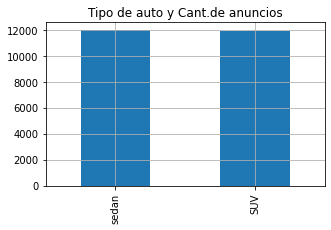

In [47]:
cant_tipo= datos_sin_atipicos[(datos_sin_atipicos['type'] == 'sedan') | (datos_sin_atipicos['type'] == 'SUV')]
grafica_type= cant_tipo['type'].value_counts()
grafica_type.plot(kind='bar',title= 'Tipo de auto y Cant.de anuncios',grid=True,figsize=(5,3))
plt.show()

In [48]:
grafica_type.head()


sedan    11976
SUV      11895
Name: type, dtype: int64

La mayor cantidad de anuncios es de los autos del tipo Sedán con 10021 seguido por SUV (vehículos todo terreno) con 9977 en cuanto a los precios el promedio es de 6979.877258 para los Sedán y 10424.409041 para los del tipo SUV.

## Factores de precio <a id='factores'></a>

In [49]:
# Matriz de correlación
datos_sin_atipicos.corr()

,price_sin_atipicos,model_year,condition_sin_atipicos,cylinders_sin_atipicos,odometer_sin_atipicos,is_4wd,days_listed,day,month,year_publicacion,años_vehiculo_sin_atipicos,promedio_odometer
price_sin_atipicos,1.000000,0.513117,0.184900,0.314738,-0.440354,0.332242,-0.000626,-0.001512,-0.009550,0.007799,-0.511089,0.173561
model_year,0.513117,1.000000,0.267533,-0.148222,-0.603852,-0.017635,-0.002275,0.001531,-0.019883,0.018628,-0.995732,0.479399
condition_sin_atipicos,0.184900,0.267533,1.000000,-0.076562,-0.266255,0.001743,0.001345,-0.012452,-0.004569,0.005662,-0.266328,0.043515
cylinders_sin_atipicos,0.314738,-0.148222,-0.076562,1.000000,0.120075,0.418026,0.002374,-0.004505,0.001235,-0.001210,0.147733,-0.032458
odometer_sin_atipicos,-0.440354,-0.603852,-0.266255,0.120075,1.000000,0.056405,0.004160,-0.002613,0.014747,-0.010327,0.601359,0.188217
is_4wd,0.332242,-0.017635,0.001743,0.418026,0.056405,1.000000,0.003032,-0.001723,0.003383,-0.002267,0.017381,0.041356
days_listed,-0.000626,-0.002275,0.001345,0.002374,0.004160,0.003032,1.000000,-0.000611,-0.010757,0.010826,0.003269,-0.004372
day,-0.001512,0.001531,-0.012452,-0.004505,-0.002613,-0.001723,-0.000611,1.000000,0.033341,-0.062288,-0.007277,0.009374
month,-0.009550,-0.019883,-0.004569,0.001235,0.014747,0.003383,-0.010757,0.033341,1.000000,-0.817523,-0.055633,0.112918
year_publicacion,0.007799,0.018628,0.005662,-0.001210,-0.010327,-0.002267,0.010826,-0.062288,-0.817523,1.000000,0.073729,-0.135182


<AxesSubplot:xlabel='price_sin_atipicos', ylabel='años_vehiculo_sin_atipicos'>

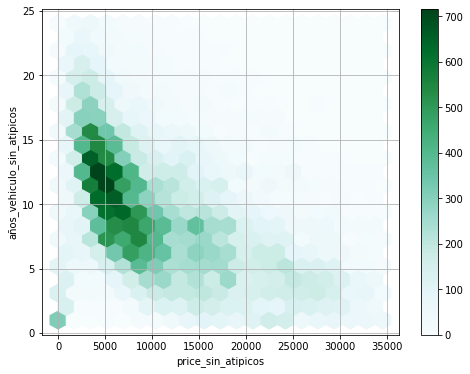

In [50]:
# Correlación entre price y años del vehículo
datos_sin_atipicos.plot(x='price_sin_atipicos',y='años_vehiculo_sin_atipicos',kind='hexbin',grid=True,
                        gridsize=20,figsize=(8,6),sharex=False)

Tenemos una correlación débilmente negativa con un valor de -0.53 también lo podemos observar en la gráfica donde el incremento en x se relaciona con un decrecimiento en y.

<AxesSubplot:xlabel='price_sin_atipicos', ylabel='odometer_sin_atipicos'>

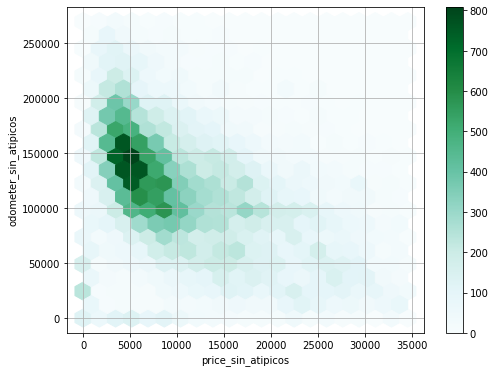

In [51]:
# Correlación entre price y millaje
datos_sin_atipicos.plot(x='price_sin_atipicos',y='odometer_sin_atipicos',kind='hexbin',grid=True,
                        gridsize=20,figsize=(8,6),sharex=False)

Tenemos una correlación débilmente negativa con un valor de -0.43 también lo podemos observar en la gráfica donde el incremento en x se relaciona con un decrecimiento en y.

<AxesSubplot:xlabel='price_sin_atipicos', ylabel='condition_sin_atipicos'>

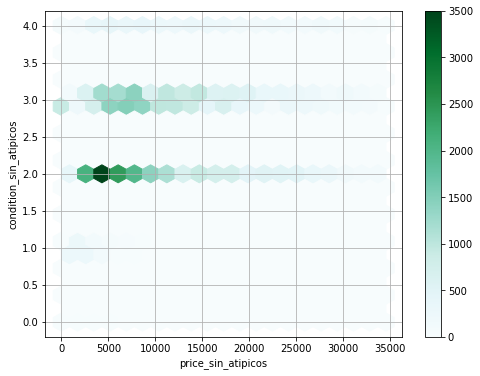

In [52]:
# Correlación entre price y condition
datos_sin_atipicos.plot(x='price_sin_atipicos',y='condition_sin_atipicos',kind='hexbin',grid=True,
                        gridsize=20,figsize=(8,6),sharex=False)

Tenemos una correlación débilmente positiva con un valor de 0.19 también lo podemos observar en la gráfica donde el incremento en x se relaciona muy ligeramente con un crecimiento en y.

automatic    44090
manual        2436
other         1746
Name: transmission, dtype: int64


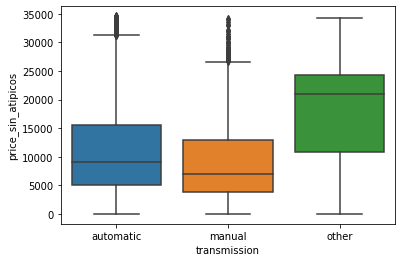

In [53]:
# Correlación entre price y transmission
print(datos_sin_atipicos['transmission'].value_counts())
var='transmission'
subconjunto= datos_sin_atipicos[['transmission','price_sin_atipicos']]
grafico_transmission= sns.boxplot(x=var, y='price_sin_atipicos', data=subconjunto)

En el diagrama de cajas y bigotes tenemos los tipos de transmiciones relacionadas con los precios de los vehículos. 
Para el tipo de transmisión automática el valor Q1 está ubicado en los 5000 mientras que el Q3 en los 16000 y una mediana ubicada en los 9000 y presenta valores atípicos mayores a 30000. 
Para el tipo de transmisión Manual Q1 se ubica en los 4000, Q3 en 13000 y la mediana en 7000 y presenta valores atípicos mayores a 27000.
Para otros Q1 se ubica en 11000 Q3 en 24000 y la mediana en 22000 por lo que la mayoría de los datos se concentran en los valores más altos. 
        

white            9204
No disponible    8692
black            7177
silver           6027
grey             4806
blue             4231
red              4078
green            1301
brown            1133
custom           1094
yellow            226
orange            213
purple             90
Name: paint_color, dtype: int64


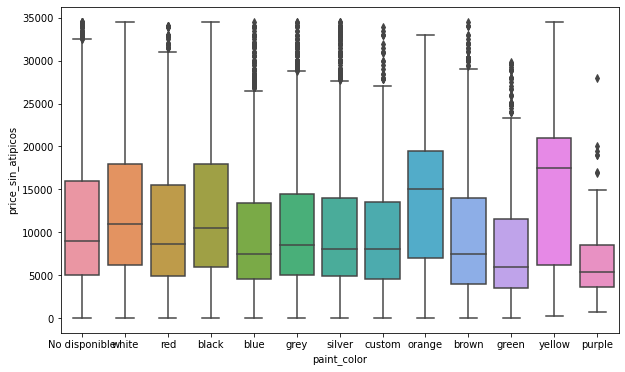

In [54]:
# Correlación entre price y paint_color
print(datos_sin_atipicos['paint_color'].value_counts())
var1='paint_color'
subconjunto1= datos_sin_atipicos[['paint_color','price_sin_atipicos']]
f, ax = plt.subplots(figsize=(10, 6))
grafico_paint_color= sns.boxplot(x=var1, y='price_sin_atipicos', data=subconjunto1)


Los vehículos con los colores más publicados son white y black cuyos valores son muy parecidos Q1 está cerca de los 6000,Q3 cerca de los 18000 y la mediana ligeramente por encima de los 10000 y no tienen valores atípicos. El color purple solo tiene 78 vahículos es el valor más bajo del conjunto de datos Q1 es de 3000, Q3 está en los 9000 y su mediana en 7000 tiene valores atípicos, algunos mucho mas altos que los otros llegan casi a los 30000. Los colores red, grey,silver, custom,blue, brown y green también tienen valores atípicos. 

## Conclusión general <a id='general'></a>

En líneas generales el conjunto de datos tenía algunos valores problemáticos que debieron ser solventados, las columnas model_year, cylinders, odometer, paint_color tenían valores ausentes, pero el caso mas drámatico fue el de is_4wd con 25953 valores ausentes, por lo que a primera vista se puede determinar que los valores ausentes en la columna is_4wd tienen un patrón (MNAR), solo tiene 1 y NaN por lo que se puede intuir que el NaN corresponde a 0 y que estos vehículos no cuentan con tracción en las 4 ruedas por lo que se sustituyeron todos los NaN por 0, el resto de los valores ausentes también fueron solucionados.  

Se corrigieron los tipos de datos de las variables model_year a int, date_posted a tipo datetime y la variable is_4wd a bool.

Se agregaron algunas columnas day (día de la publicación), month (mes de la publicación), year_publicacion (año de la publicación) y años_vehiculo (años de uso del vehículo) para enriquecer los datos. 

Se reemplazaron los valores de condition por números enteros para así graficar los datos.

Se segmentó el conjunto de datos para no incluir valores atípicos en las variables principales. 

**En base al estudio de los datos se puede concluir lo siguiente:**

1- En la variable price la mayoría de datos se encuentran en los valores cercanos a los 5000 y luego a medida que aumenta el precio va bajando la cantidad de anuncios publicados.

2- En la variable años_vehículo la mayoría de datos se encuentran en los valores cercanos a los 5 años y luego tenemos otro pico a los 11 años, a partir de ahí a medida que aumentan los años del vehículo van bajando la cantidad de anuncios publicados

3-En la variable odometer la mayoría de datos se encuentran en los valores muy cercanos al 0 luego observamos una curba donde tenemos el próximo pico entre los 10000 y 15000, a partir de ahí a medida que aumenta el millaje van bajando la cantidad de anuncios publicados.

4-En la variable cylinders la mayor cantidad de datos se encuentra en 8 cilindros y muy poca diferencia con 6 cilindros, mientras que en el gráfico sin valores atípicos el pico se encuentra en 6 cilindros seguido por 8 cilindros. En ambos gráficos 3, 5 y 10 tienen muy poca frecuencias.

5-En la variable conditions el pico se encuentra en el número 3= Excelente, y los que tienen menos frecuencia son 0= para rescate y 5= nuevo.

6- Se estudió el periodo de colocación de los anuncios y se pudo determinar que la media de la variable 'days_listed' es de 39.563914 días mientras que la mediana es de 33.000000 días, tenemos una diferencia considerable debido a que el conjunto de datos tiene algunos valores atípicos bastante altos.

7-Se calculó la mediana de aquellos anuncios que fueron dados de baja el mismo día de la publicación  y se obtuvo que para precio la mediana es de 8900, vehículos con 9 años, 102466 en millaje, 6 cilindros y con la condición Excelente.

8-Para determinar aquellos anuncios donde el tiempo de publicación fue anormalmente largo se calculó el límite superior que dió como resultado 104 por lo que se segmentó el conjunto de datos para los mayores o iguales a 104, luego se calculó la mediana relacionada con las otras variables y se obtuvo que para precio la mediana es de 8200, vehículos con 8 años, 105000 en millaje, 6 cilindros y con la condición Excelente.

9- Los tipo de autos que cuentan con más publicaciones son los de tipo Sedan y SUV, en cuanto a los precios el promedio es de 6979.877258 para los Sedán y 10424.409041 para los del tipo SUV.

10-Entre las variables price y años del vehículo tenemos una correlación débilmente negativa con un valor de -0.53 también lo podemos observar en la gráfica donde el incremento en x se relaciona con un decrecimiento en y.

11-Entre  las variables price y millaje tenemos una correlación débilmente negativa con un valor de -0.32 también lo podemos observar en la gráfica donde el incremento en x se relaciona con un decrecimiento en y.

12-Entre  las variables price y condition tenemos una correlación débilmente positiva con un valor de 0.19 también lo podemos observar en la gráfica donde el incremento en x se relaciona muy ligeramente con un crecimiento en y. 

13-Entre las variables price y transmission por ser una variable categórica se utilizó el diagrama de cajas y bigotes, para el tipo de transmisión automática el valor Q1 está ubicado en los 5000 mientras que el Q3 en los 16000 y una mediana ubicada en los 9000 y presenta valores atípicos mayores a 30000. Para el tipo de transmisión Manual Q1 se ubica en los 4000, Q3 en 13000 y la mediana en 7000 y presenta valores atípicos mayores a 27000. Para otros Q1 se ubica en 11000 Q3 en 24000 y la mediana en 22000 por lo que la mayoría de los datos se concentran en los valores más altos.

14-Entre las variables price y paint_color por ser una variable categórica se utilizó el diagrama de cajas y bigotes, los vehículos con los colores más publicados son white y black cuyos valores son muy parecidos Q1 está cerca de los 6000,Q3 cerca de los 18000 y la mediana ligeramente por encima de los 10000 y no tienen valores atípicos. El color purple solo tiene 78 vahículos es el valor más bajo del conjunto de datos Q1 es de 3000, Q3 está en los 9000 y su mediana en 7000 tiene valores atípicos, algunos mucho mas altos que los otros llegan casi a los 30000. Los colores red, grey,silver, custom,blue, brown y green también tienen valores atípicos.

